1. Load the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


In [10]:
df = pd.read_csv('energy.csv', header=0, index_col=0)
df

,Value
Time,
2010-01,62623.1960
2010-02,55850.2170
2010-03,57069.6450
2010-04,51282.6970
2010-05,54092.5900
...,...
2022-09,41031.7113
2022-10,45584.7710
2022-11,58841.7691


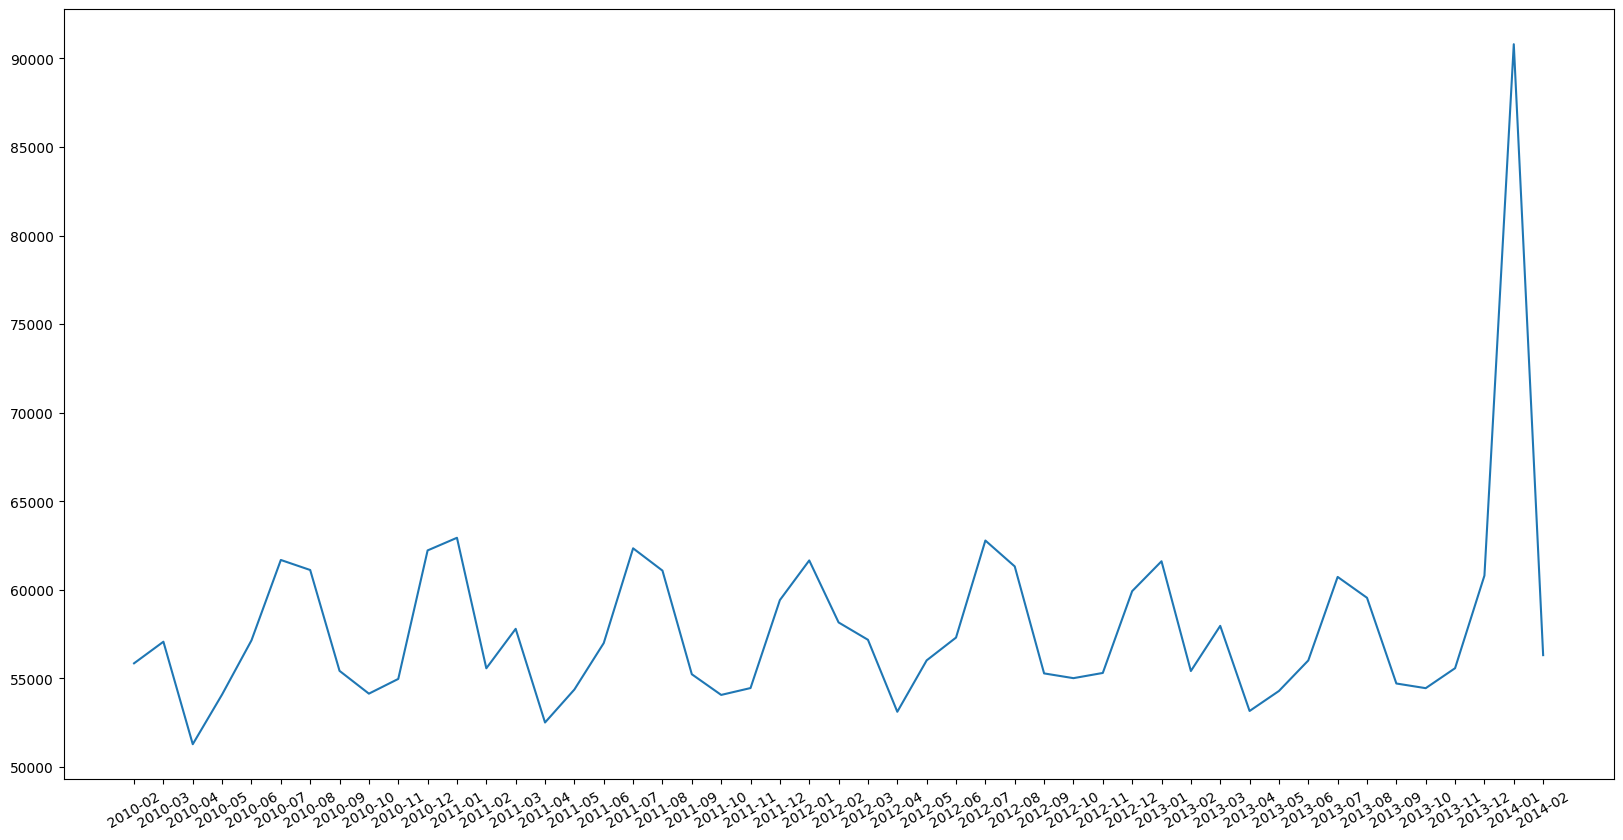

In [14]:
plt.figure(figsize=(20,10))
plt.plot(df[1:50]["Value"]) # -> cuma baca data index 1 - 49
plt.xticks(rotation=30)
plt.show()

# 2. Smoothing

1. Moving Average Method

              Value
Time               
2010-02         NaN
2010-03         NaN
2010-04         NaN
2010-05         NaN
2010-06  55088.2624
2010-07  56255.1718
2010-08  57064.9804
2010-09  57893.2748
2010-10  57902.2406
2010-11  57466.7262


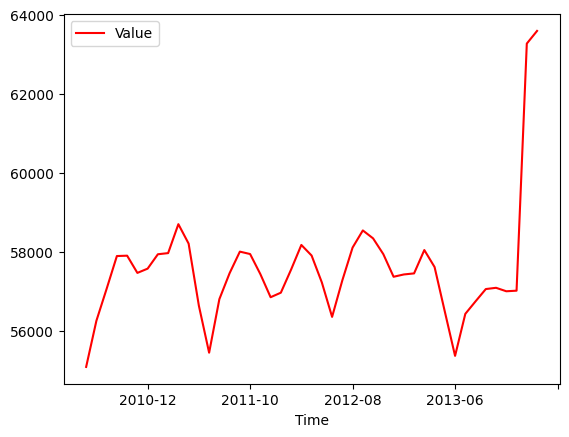

In [15]:
rollingseries = df[1:50].rolling(window=5)
rollingmean = rollingseries.mean()
print(rollingmean.head(10))
rollingmean.plot(color='red')
plt.show()

2. Simple Exponential Smoothing

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


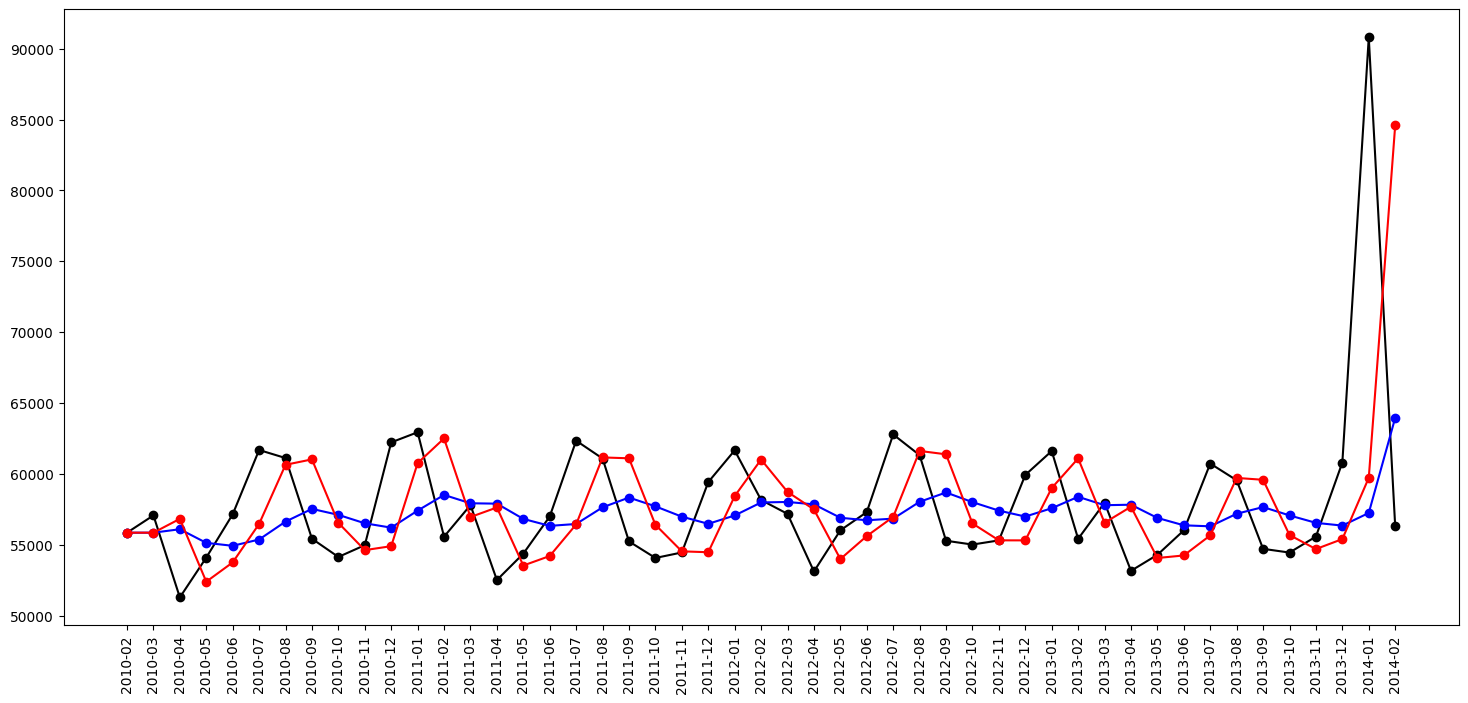

In [19]:
data = df[1:50]

fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)
fit2 = SimpleExpSmoothing(data).fit(smoothing_level=0.8,optimized=False)

plt.figure(figsize=(18, 8))
plt.plot(df[1:50], marker='o', color="black")
plt.plot(fit1.fittedvalues, marker="o", color="b")
plt.plot(fit2.fittedvalues, marker="o", color="r")
plt.xticks(rotation="vertical")
plt.show()

3.  Holt method for exponential smoothing

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


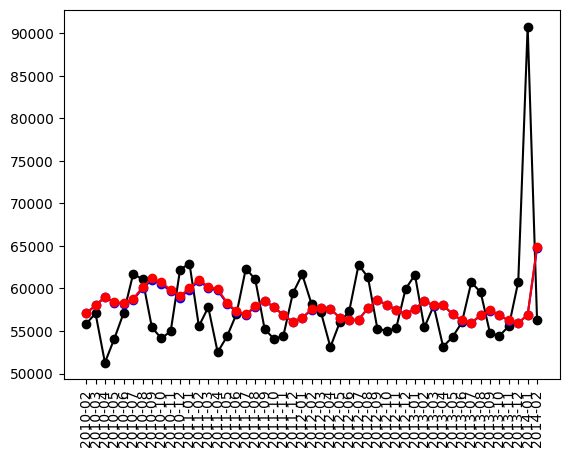

<Figure size 2000x800 with 0 Axes>

In [27]:
fit1 = Holt(data).fit()  #linear trend
fit2 = Holt(data, exponential=True).fit()  #exponential trend
plt.plot(data, marker='o', color='black')
plt.plot(fit1.fittedvalues, marker='o', color='b')
plt.plot(fit2.fittedvalues, marker='o', color='r')
plt.xticks(rotation="vertical")
plt.figure(figsize=(20, 8))
plt.show()

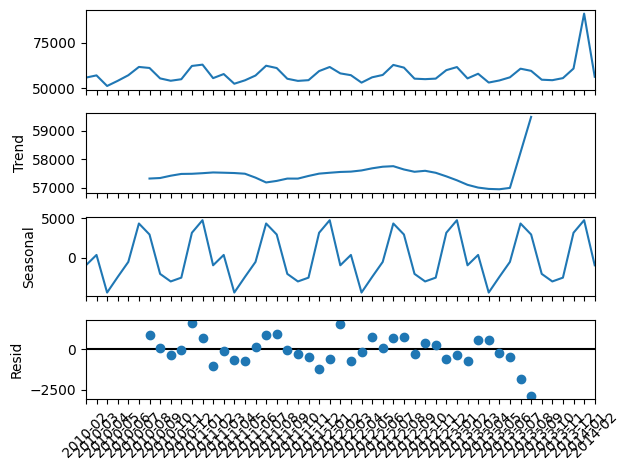

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data, model='additive', period=12)  # ubah period sesuai data kamu
result.plot()
plt.xticks(rotation=45)  # atau 60 kalau masih terlalu rapat
plt.tight_layout()       # supaya plot tidak terpotong atau tumpang tindih
plt.show()

# 3. check which type of time series data we have

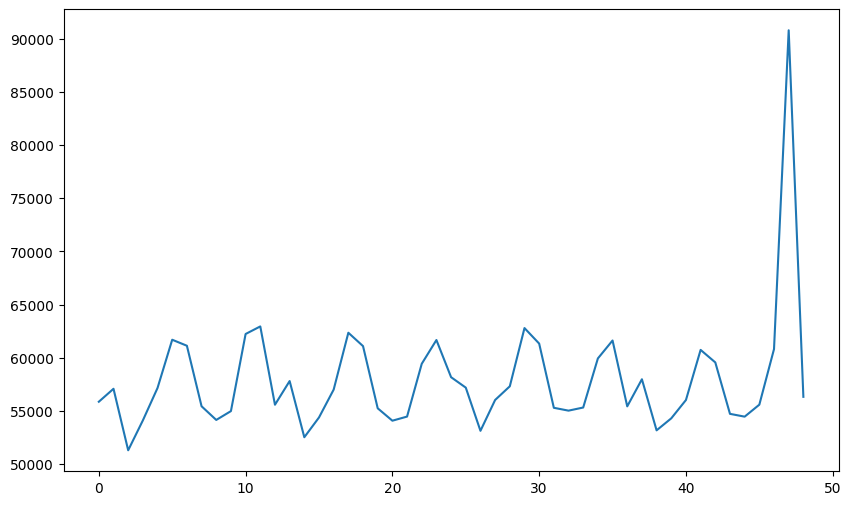

In [40]:

plt.rcParams.update({'figure.figsize': (10, 6)})
plt.plot(data['Value'])

Decomposition of time-series data

In [55]:
# Additive Decomposition
add_result = seasonal_decompose(data['Value'], model='additive',period=7)
# Multiplicate Decomposition
mul_result = seasonal_decompose(data['Value'], model='multiplicative',period=7)

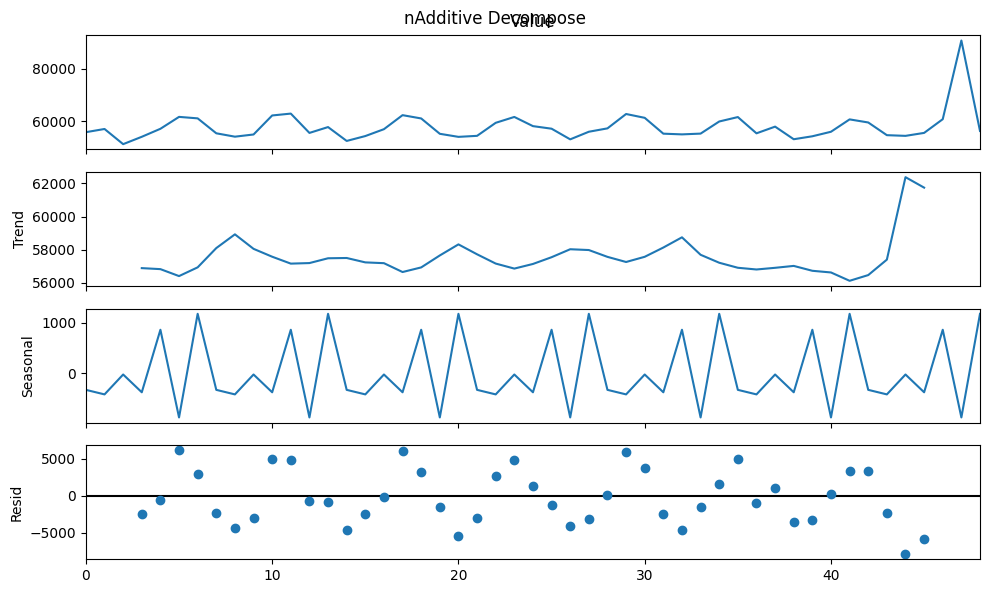

In [56]:
add_result.plot().suptitle('nAdditive Decompose', fontsize=12)
plt.show()

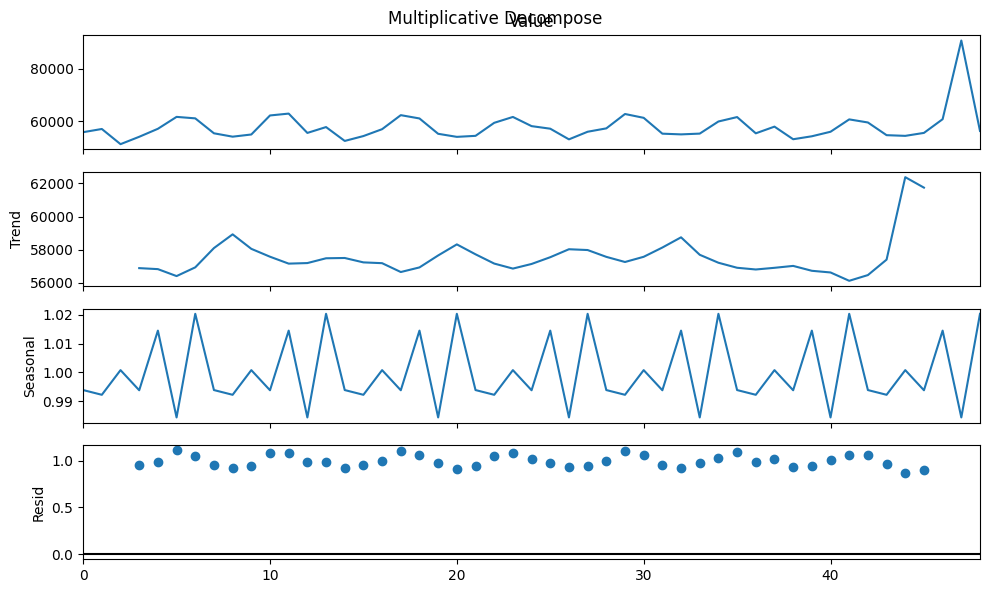

In [57]:
mul_result.plot().suptitle('Multiplicative Decompose', fontsize=12)
plt.show()

In [58]:
new_df_add = pd.concat([add_result.seasonal, add_result.trend, add_result.resid, add_result.observed], axis=1)
new_df_add.columns = ['seasoanilty', 'trend', 'residual', 'actual_values']
new_df_add.head()

,seasoanilty,trend,residual,actual_values
0,-329.851212,NaN,NaN,55850.217
1,-419.572950,NaN,NaN,57069.645
2,-26.702426,NaN,NaN,51282.697
3,-377.862657,56892.109143,-2421.656485,54092.590
4,856.870788,56831.245143,-541.952931,57146.163


In [62]:
from statsmodels.tsa.stattools import adfuller
adfuller_result = adfuller(data['Value'], autolag='AIC')
print(f'ADF Statistic: {adfuller_result[0]}')
print(f'p-value: {adfuller_result[1]}')
for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.2476775221942966
p-value: 0.18939829543728703
Critial Values:
   1%, -3.6209175221605827
Critial Values:
   5%, -2.9435394610388332
Critial Values:
   10%, -2.6104002410518627


In [63]:
data_diff = data['Value'].diff().dropna()

# Coba ADF lagi
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(data_diff.values)

print(f'ADF Statistic after differencing: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic after differencing: -1.2851561069987614
p-value: 0.6359357562695909


In [64]:
data_diff2 = data['Value'].diff().diff().dropna()
adf_result2 = adfuller(data_diff2.values)

print(f'ADF Statistic after 2nd differencing: {adf_result2[0]}')
print(f'p-value: {adf_result2[1]}')

ADF Statistic after 2nd differencing: -0.4120043028186411
p-value: 0.9080751125534863


Karena data tidak stasioner, dan coba di differencing P-Valuenya malah naik, saya coba pakai holtwinters smoothing

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


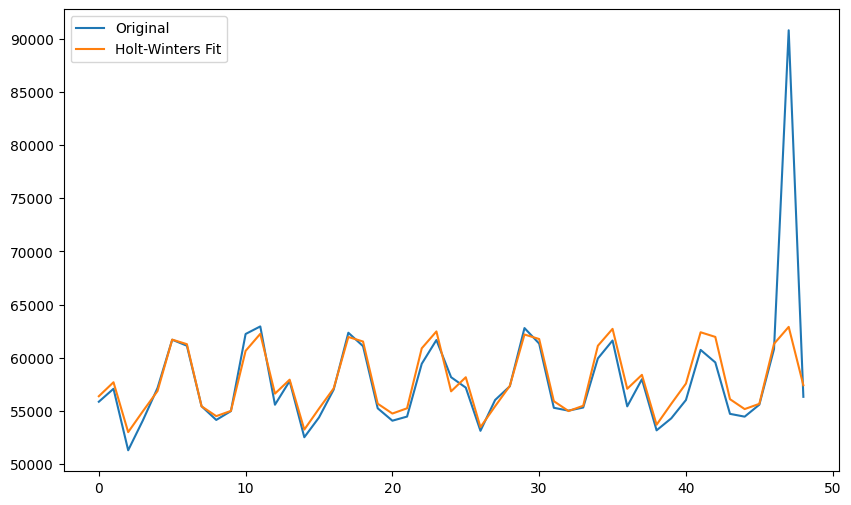

In [65]:

from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(data['Value'],
                              trend='add',
                              seasonal='add',
                              seasonal_periods=12).fit()

plt.plot(data['Value'], label='Original')
plt.plot(model.fittedvalues, label='Holt-Winters Fit')
plt.legend()
plt.show()

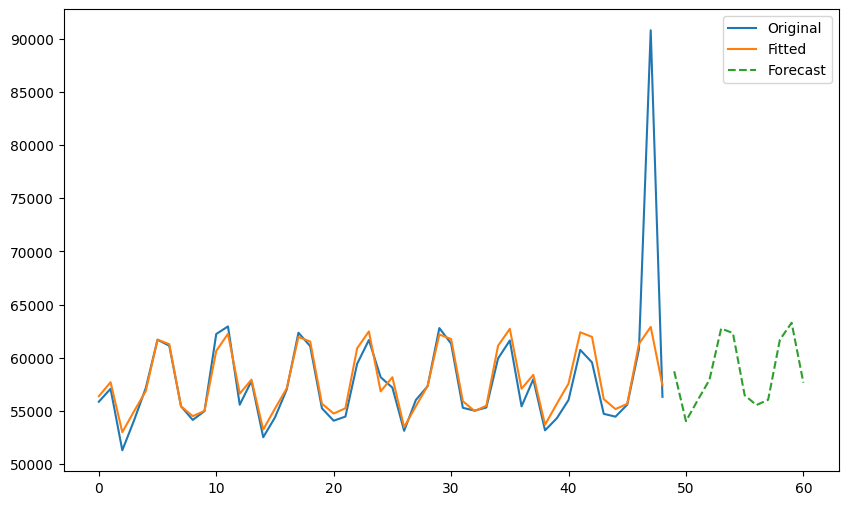

In [66]:
# Prediksi ke depan
future = model.forecast(12)  # misal 12 bulan ke depan
plt.plot(data['Value'], label='Original')
plt.plot(model.fittedvalues, label='Fitted')
plt.plot(future, label='Forecast', linestyle='--')
plt.legend()
plt.show()

In [67]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Hitung MSE
mse = mean_squared_error(data['Value'], model.fittedvalues)

# Hitung RMSE
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Root Mean Squared Error (RMSE): 4090.33
